# Import libraries

Le but de ce projet consiste en la prédiction de l'annulation ou non d'une réservation d'hôtel par un client.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image



import time
import lightgbm as lg
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
sns.set_theme()

from sklearn.metrics import classification_report, f1_score, recall_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [2]:
df = pd.read_csv("Hotel Reservations.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## First Data Analysis

In [4]:
df.shape

(36275, 19)

In [5]:
# Features Formats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
# Df empty cells
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
# Duplicates Cells
df.duplicated().sum()

0

In [8]:
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [9]:
print(f'Numeric Features: {df.select_dtypes(include=np.number).shape[1]}\nObject Features: {df.select_dtypes(include="object").shape[1]}')

Numeric Features: 14
Object Features: 5


La première analyse de nos données semble plutôt bonne : nous n'avons ni valeurs nulles ni de valeurs dupliquées dans notre dataset. Le nombre de valeur uniques par paramètres semble aussi cohérentes. Nous pouvons désormais avancer vers la partie suivante de notre analyse de données : l'exploration.

## EDA : Exploratory Data Analysis

### Distribution analysis

In [10]:
print(df.select_dtypes(include='object')) # showing object type columns (string-like)

      Booking_ID type_of_meal_plan room_type_reserved market_segment_type  \
0       INN00001       Meal Plan 1        Room_Type 1             Offline   
1       INN00002      Not Selected        Room_Type 1              Online   
2       INN00003       Meal Plan 1        Room_Type 1              Online   
3       INN00004       Meal Plan 1        Room_Type 1              Online   
4       INN00005      Not Selected        Room_Type 1              Online   
...          ...               ...                ...                 ...   
36270   INN36271       Meal Plan 1        Room_Type 4              Online   
36271   INN36272       Meal Plan 1        Room_Type 1              Online   
36272   INN36273       Meal Plan 1        Room_Type 1              Online   
36273   INN36274      Not Selected        Room_Type 1              Online   
36274   INN36275       Meal Plan 1        Room_Type 1             Offline   

      booking_status  
0       Not_Canceled  
1       Not_Canceled  
2     

On veut réaliser une analyse qualitative des colonnes de notre dataset ayant des valeurs objet (des string ici). Nous disposons de 5 colonnes objet, mais pour cette analyse nous allons ignorer la colonne Booking_ID puisque celle-ci ne nous fournit aucune information pertinente quant à l'impact sur l'annulation des réservations d'hôtel. 

In [11]:
def qualitative_analysis(df):
    figure = plt.figure(figsize=(30,10))
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.5, top=1, wspace=0.7)
    size = (2,2) # (2x2 matrix made to display each of our 4 columns (we have 4 pos (1,1), (1,2), (2,1), (2,2)))
    cpt = 1    # the column we're gonna make a fig of
    
    for row in range(2):
        for col in range(2):
            pos = (row, col) # the position of the fig we're making (starts with (1,1) ends in (2,2))
            ax = plt.subplot2grid(size, pos) # creating a grid figure
            
            feature = df.columns[cpt] # we select the feature we want to analyze
            load = df[feature].value_counts() # counting the number of element per value type
            fig = sns.barplot(y = load.index, x = load.values, ax=ax) # creating the plot
            fig.set_title(feature)
            
            for n,i in enumerate(load.values):
                percent =f'{round((i/sum(load.values))*100, 2)}%' # calculating the percentage per value
                fig.annotate(f'{i} ({percent})', xy=(i,n)) # displaying the percentage near each value
                
            cpt += 1
            
    return plt.show()

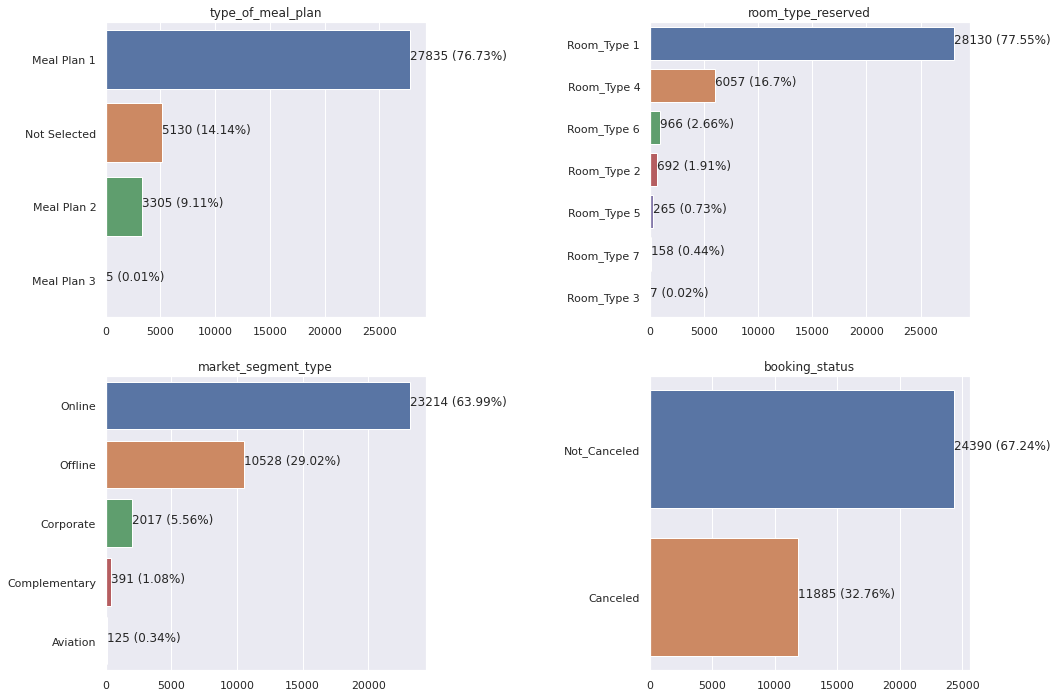

In [12]:
qualitative_analysis(df.select_dtypes(include='object')) # selecting only the 

In [13]:
print(df.select_dtypes(include=np.number)) # showing the numerical columns

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0                 2               0                     1                  2   
1                 2               0                     2                  3   
2                 1               0                     2                  1   
3                 2               0                     0                  2   
4                 2               0                     1                  1   
...             ...             ...                   ...                ...   
36270             3               0                     2                  6   
36271             2               0                     1                  3   
36272             2               0                     2                  6   
36273             2               0                     0                  3   
36274             2               0                     1                  2   

       required_car_parking_space  lead

In [14]:
def quantitative_analysis(df):
    figure = plt.figure(figsize=(10,32)) # we will display our figs vertically for them to be visually easier to browse
    plt.subplots_adjust(top=0.85, wspace=0.8, hspace=0.5) # adjusting the spaces between the text and images
    size = (8,2) # (7x2) matrix size because we have a total of 14 numerical columns, we need 14 pos for the fig
    c = 0 # this time we start at index 0 because we plan on studying every column
    
    for row in range(8):
        for col in range(2):
            if c == df.shape[1]: # in case there's a bug we will not go further than the total number of columns
                break
                
            pos = (row, col) # position of our current fig
            ax = plt.subplot2grid(size, pos) # creating and placing the subplot
            feature = df.columns[c] # selecting the column we currently want to plot
            load = df[feature] # loading the data of our feature column in load variable
            
            if load.nunique() > 30:
                fig = sns.histplot(data = load, ax=ax, bins=30) # in case for those plots to be visually easier to read we make them histograms
            else:
                fig = sns.countplot(y=load, ax=ax) # else, if there aren't too many different values, countplots
                bin = (load.value_counts(normalize=True)*100).round(2).sort_index() # normalizing our unique values storing them in ordered index
                for n, pa in enumerate(fig.patches):
                    x = pa.get_width()
                    b = bin.values[n] # getting the number per unique values
                    fig.annotate(f'{x} ({b}%)', xy=(x,n), verticalalignment='center') # annoting with the percentage and bin values

            fig.set_title(feature) # setting the title of current figure which is its feature
            c += 1 # moving on to the next fig
        
    
    return plt.show()

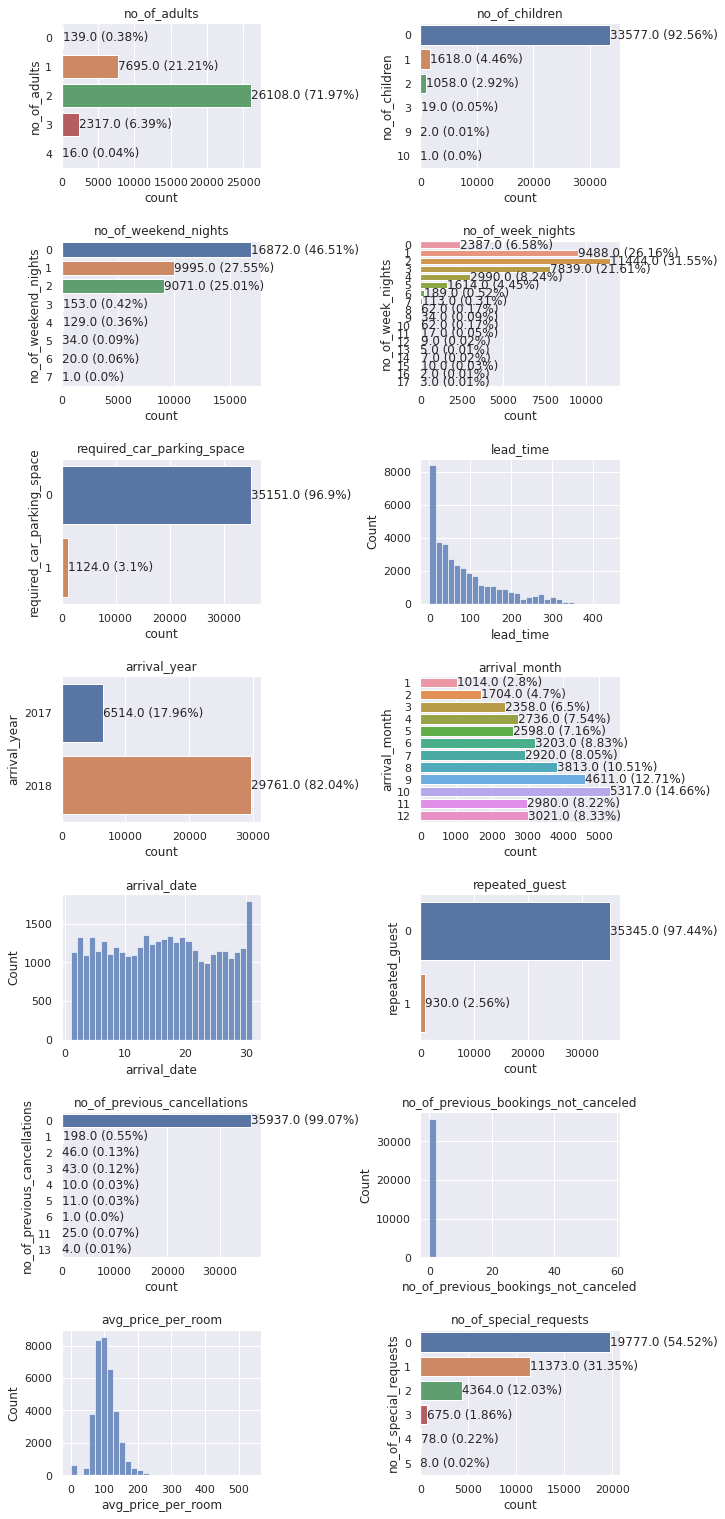

In [15]:
quantitative_analysis(df.select_dtypes(include=np.number))

### Correlation

In [16]:
def matrix_corr(df):
    plt.figure(figsize=(15,8))
    corr = abs(df.corr(method='spearman')) # creating correlation variable using spearman method
    col = corr.sum(1)[corr.sum(1)>1].index
    corr = corr.loc[col,col]
    mask = np.triu(np.ones_like(corr, dtype=bool)) # masking all the upper side of the matrix to avoid duplicate values
    
    fig = sns.heatmap(corr[col], mask=mask, annot=True, fmt=".1%") # creating heatmap, using the mask and setting anotation of percentage to 2nd decimal 

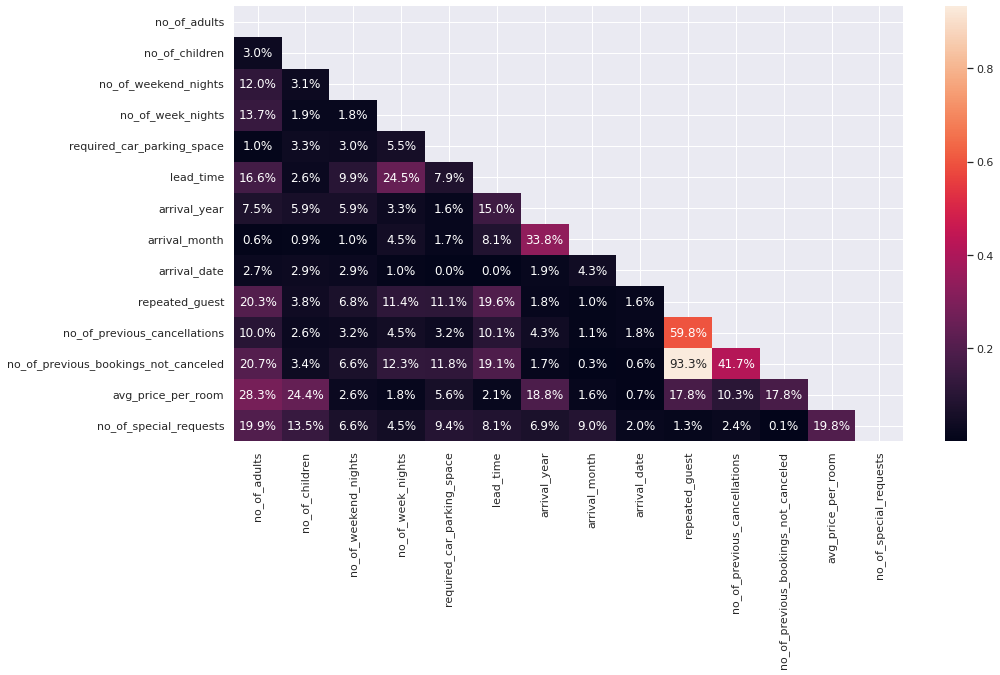

In [17]:
matrix_corr(df)

# Prediction

In [24]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
# Imports

from lightgbm import LGBMClassifier
from skopt import gp_minimize

from sklearn.metrics import classification_report, f1_score, recall_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

In [30]:
# Feature Engineering and separation of dependent and independent variables.
def treatment(dte):

    dt = dte.copy()

    # Power Transformation - apply log transformation to 'lead_time' and 'avg_price_per_room' columns
    # adding 1 to each value to avoid issues with zero values
    for l in ['lead_time','avg_price_per_room']:
        dt[l] = np.log(dt[l] + 1)
    
    # Label Encoder - convert all categorical columns to numeric values using LabelEncoder
    for l in dt.select_dtypes(include='object'):
        dt[l] = LabelEncoder().fit_transform(dt[l])
        
    # Target separation - separate the input data into independent and dependent variables
    X = dt.drop('booking_status', axis=1)
    y = dt['booking_status']
    
    
    # StandardScaler - apply MinMaxScaler to scale all the independent variables
    std = MinMaxScaler()
    X.iloc[:,:] = std.fit_transform(X)
    
    return X, y


#Using SMOTE to balance the data
def unbalanced(xtr, ytr):
   
    # Use SMOTETomek to resample the data, creating synthetic samples for the minority class ('booked')
    # until it reaches the number of samples in the majority class ('not booked')
    smote = SMOTETomek(sampling_strategy = 'minority')
    X_SM, Y_SM = smote.fit_resample(xtr, ytr)
    return X_SM, Y_SM



#Model is going to divide the data into train and test doing a cross-validation.
def model(dte):
    

    skf = StratifiedKFold(n_splits=10)
    
    X, y = treatment(dte) # Apply feature engineering to the input data
    
    disket_0 = []
    disket_1 = []
    acc = []
    for train_index, test_index in skf.split(X,y):

        # Split the data into train and test sets
        x_train  = X.iloc[train_index]
        y_train = y[train_index]
        x_test = X.iloc[test_index]
        y_test = y[test_index]
        
        # Balanced
        x_train, y_train = unbalanced(x_train, y_train)
        
        # Model
        model = LGBMClassifier().fit(x_train, y_train) # Train a LGBMClassifier model
        predict = model.predict(x_test) # Test the model on the test set

        # Validation 
        res = classification_report(y_test, predict,output_dict=True) # Calculate classification report for the test set, and collect accuracy, precision, recall and f1-score for each class
        acc.append(res['accuracy']) #get accuracy
        s = []
        ss = []
        for n in list(res['0'].keys())[:3]:
            s.append(res['0'][n]) # get precision, recall and f1-score for 'not booked' class
        for n in list(res['1'].keys())[:3]:
            ss.append(res['1'][n]) # get precision, recall and f1-score for 'booked' class
            
            
        disket_0.append([s,ss])
    lg.plot_importance(model)
    print(f"Accuracy : {(np.array(acc).mean(axis=0))*100}")
    return  pd.DataFrame(np.array(disket_0).mean(axis=0), columns=['Precision','Recall','F1_score'])*100
            

Accuracy : 88.14887744707785


,Precision,Recall,F1_score
0,83.428117,79.739581,81.502193
1,90.348048,92.246822,91.278885


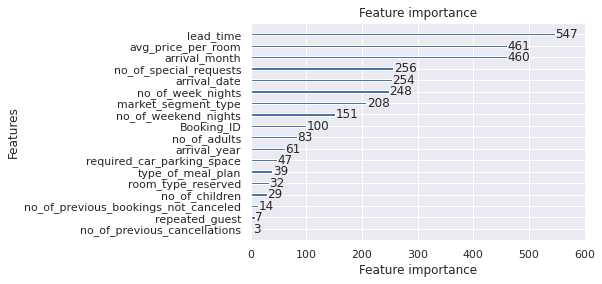

In [31]:
model(df)

L'objectif est donc d'amélioer le "recall 0", ce qui signifie que nous devons identifier le plus grand nombre possible de personnes qui annuleront leur réservation.

# Optimisation

In [32]:
def hyperparameter(params):
      # Data for evaluation
    X, y = treatment(df)

    parameters = {
    'learning_rate': params[0], # How much each tree will contribute to the forest this model will create.
    'colsample_bytree' : params[1], # Kind of gives diversity in the trees created, Doesn't make all trees available for training.
    'max_depth':params[2],
    'n_estimators':params[3]
    } 


    mdl = LGBMClassifier(**parameters, random_state=0)

    res = -np.mean(cross_val_score(estimator = mdl,
                             X =  X, 
                             y=y,
                             cv=10,
                             n_jobs=-1, 
                             scoring='accuracy'))
    print( params, res)

    print(f'\n {"-"*30} ')
    return res


In [33]:
def result_analyze_1(entr):
    params = entr.x
    re = entr.fun
    final_res = {
    'learning_rate': params[0],
    'colsample_bytree' : params[1],
    'max_depth': params[2],
    'n_estimators':params[3],
    'accuracy': round(re*(-100),2)}
    return pd.DataFrame(final_res, index=['Results:'])

In [34]:
space_gb = [
    (1e-1, 2e-1, 'log-uniform'), # Learning-Rate
    (0.89, 0.99), # Colsample bytree
    (2, 38), # Max depth
    (1499,2000) # N_estimators
]
gb_result = gp_minimize(hyperparameter, space_gb, random_state=1, verbose=True, n_calls = 50,  n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[0.19961011245327528, 0.9832557359338658, 7, 2000] -0.8837494516958898

 ------------------------------ 
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 63.2128
Function value obtained: -0.8837
Current minimum: -0.8837
Iteration No: 2 started. Evaluating function at random point.
[0.11777954268555313, 0.9296580727296027, 16, 1835] -0.8888216788881869

 ------------------------------ 
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 53.5236
Function value obtained: -0.8888
Current minimum: -0.8888
Iteration No: 3 started. Evaluating function at random point.
[0.1912605156949504, 0.9746310916686017, 13, 1762] -0.8878294422360291

 ------------------------------ 
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 48.1492
Function value obtained: -0.8878
Current minimum: -0.8888
Iteration No: 4 started. Evaluating function at random point.
[0.13598550633931947, 0.9129577213

In [35]:
# The best parameters
rest = result_analyze_1(gb_result)
pr = {}
for i in rest.columns[:4]:
    pr.update({i:rest[i].values[0]})
pr

{'learning_rate': 0.10374118712248254,
 'colsample_bytree': 0.8930188927826874,
 'max_depth': 25,
 'n_estimators': 1998}

In [36]:
def model_2(dte, params):
    """
    Model is going to divide the data into train and test doing a cross-validation.
    """
    skf = StratifiedKFold(n_splits=10)
    X, y = treatment(dte)
    
    disket_0 = []
    disket_1 = []
    acc = []
    for train_index, test_index in skf.split(X,y):
        
        # Test and train
        x_train  = X.iloc[train_index]
        y_train = y[train_index]
        x_test = X.iloc[test_index]
        y_test = y[test_index]
        
        # Balanced
        x_train, y_train = unbalanced(x_train, y_train)
        
        # Model
        model = LGBMClassifier(**params).fit(x_train, y_train)
        predict = model.predict(x_test)

        # Validation 
        res = classification_report(y_test, predict,output_dict=True)
        acc.append(res['accuracy'])
        s = []
        ss = []
        for n in list(res['0'].keys())[:3]:
            s.append(res['0'][n])
        for n in list(res['1'].keys())[:3]:
            ss.append(res['1'][n]) 
        
        disket_0.append([s,ss])
    lg.plot_importance(model)   
    print(f"Accuracy : {(np.array(acc).mean(axis=0))*100}")
    return  pd.DataFrame(np.array(disket_0).mean(axis=0), columns=['Precision','Recall','F1_score'])*100

Accuracy : 88.2150432761273


,Precision,Recall,F1_score
0,81.288816,83.980858,82.386498
1,92.111463,90.278803,91.127476


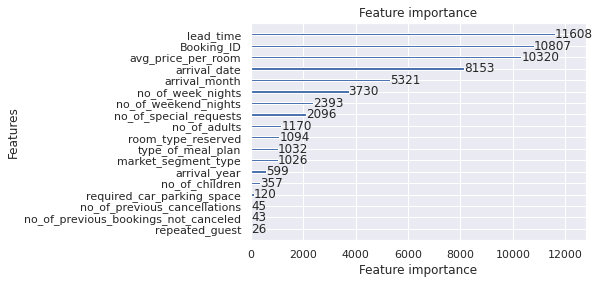

In [37]:
model_2(df, pr)